In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Парсим датасеты:

In [7]:
oil_ashan = pd.read_csv("oil_red_price copy.csv").drop(columns=['Unnamed: 218'])[:910]
oil_golden_seed = pd.read_csv("oil_golden_seed copy.csv").drop(columns=['Unnamed: 212'])[:910]
oil_ashan["target"]=["ashan"]*len(oil_ashan)
oil_golden_seed["target"]=["golden_seed"]*len(oil_golden_seed)
oil_golden_seed.tail()

,Wavelength (nm),%T,Wavelength (nm).1,%T.1,Wavelength (nm).2,%T.2,Wavelength (nm).3,%T.3,Wavelength (nm).4,%T.4,...,%T.101,Wavelength (nm).102,%T.102,Wavelength (nm).103,%T.103,Wavelength (nm).104,%T.104,Wavelength (nm).105,%T.105,target
905,194.9829712,58.04145813,194.9829712,0.075280,194.982971,0.066855,194.982971,0.063402,194.982971,0.067601,...,0.064514,194.982971,0.062851,194.982971,0.068177,194.982971,0.071227,194.982971,0.087725,golden_seed
906,193.9913483,56.98998642,193.9913483,0.065830,193.991348,0.076447,193.991348,0.074026,193.991348,0.071937,...,0.075150,193.991348,0.077970,193.991348,0.069646,193.991348,0.075370,193.991348,0.064185,golden_seed
907,192.9996185,56.066185,192.9996185,0.078857,192.999618,0.069344,192.999618,0.080762,192.999618,0.070826,...,0.068457,192.999618,0.059734,192.999618,0.049462,192.999618,0.077768,192.999618,0.061289,golden_seed
908,192.007843,54.44197845,192.007843,0.080317,192.007843,0.052470,192.007843,0.079305,192.007843,0.070204,...,0.074078,192.007843,0.067464,192.007843,0.054768,192.007843,0.066088,192.007843,0.049389,golden_seed
909,191.0159912,54.55011749,191.0159912,0.089319,191.015991,0.091769,191.015991,0.100176,191.015991,0.088878,...,0.067131,191.015991,0.069644,191.015991,0.069927,191.015991,0.081253,191.015991,0.079932,golden_seed


In [8]:
labels = oil_golden_seed.columns[13::2]
X = pd.concat([oil_ashan[labels], oil_golden_seed[labels]])[:1820]
Y = pd.concat([oil_ashan["target"], oil_golden_seed["target"]]).T
target_to_int = {"ashan":1, "golden_seed":2}
#Y = Y.target.map(target_to_int)
X.tail()

,%T.6,%T.7,%T.8,%T.9,%T.10,%T.11,%T.12,%T.13,%T.14,%T.15,...,%T.96,%T.97,%T.98,%T.99,%T.100,%T.101,%T.102,%T.103,%T.104,%T.105
905,0.066543,0.069379,0.071732,0.063395,0.085295,0.076138,0.086051,0.063430,0.081345,0.063850,...,0.058760,0.076172,0.071228,0.070233,0.056191,0.064514,0.062851,0.068177,0.071227,0.087725
906,0.085390,0.074926,0.075108,0.066723,0.079618,0.072403,0.060395,0.077526,0.072416,0.076591,...,0.071305,0.063572,0.084272,0.067720,0.092643,0.075150,0.077970,0.069646,0.075370,0.064185
907,0.058931,0.061883,0.070445,0.071444,0.061044,0.067352,0.061445,0.068622,0.093048,0.076924,...,0.071631,0.060998,0.067793,0.072505,0.060876,0.068457,0.059734,0.049462,0.077768,0.061289
908,0.061011,0.070227,0.064693,0.077442,0.075239,0.064954,0.075384,0.073353,0.072665,0.087822,...,0.065109,0.059689,0.046589,0.070687,0.063719,0.074078,0.067464,0.054768,0.066088,0.049389
909,0.087020,0.090616,0.091266,0.095589,0.088988,0.097114,0.083242,0.072074,0.085848,0.116750,...,0.079096,0.100043,0.071372,0.086893,0.069746,0.067131,0.069644,0.069927,0.081253,0.079932


Нарисуем усредненные графики спектров:

/tmp/ipykernel_2755/4275241083.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  oil_ashan_draw = oil_ashan.mean(axis=1)
/tmp/ipykernel_2755/4275241083.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  oil_golden_seed_draw = oil_ashan.mean(axis=1)


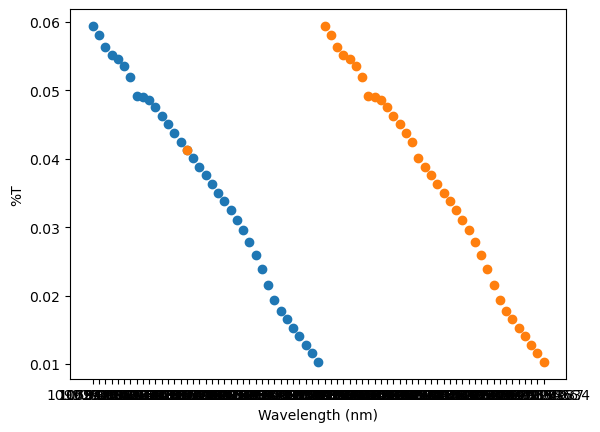

In [9]:
oil_ashan_draw = oil_ashan.mean(axis=1)
oil_golden_seed_draw = oil_ashan.mean(axis=1)
discret = 25
plt.scatter(oil_ashan["Wavelength (nm)"][:910:discret], oil_ashan_draw[::discret]/10e3)
plt.scatter(oil_golden_seed["Wavelength (nm)"][:910:discret], oil_golden_seed_draw[::discret]/10e3)
plt.xlabel("Wavelength (nm)")
plt.ylabel("%T")
plt.show()


Тестим дерево:


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
X.shape, Y.shape

((1820, 100), (1820,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, stratify=Y)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [13]:
from sklearn.metrics import classification_report
#precision, recall
y_pred = pd.Series(model.predict(X_test))
print(classification_report(y_test, y_pred))
y_test.head()
pd.Series(model.predict(X_test)).value_counts()

              precision    recall  f1-score   support

       ashan       1.00      0.99      1.00       182
 golden_seed       0.99      1.00      1.00       182

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



golden_seed    183
ashan          181
dtype: int64

Это мы сделали полный бред. Сейчас будет PCA model

In [14]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

In [17]:
pca_model = PCA(n_components=3) # преобразовываем данные в три главных компоненты 
PCA_X_train = pca_model.fit_transform(X_train) # получаем данные для обучения
PCA_X_test = pca_model.transform(X_test) # данные для теста

In [22]:
model_pca = DecisionTreeClassifier()
model_pca.fit(PCA_X_train, y_train)
y_pred = model_pca.predict(PCA_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       ashan       1.00      1.00      1.00       182
 golden_seed       1.00      1.00      1.00       182

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364

